In [12]:
import matplotlib.pylab as pl
%matplotlib inline
import minpy.numpy as np
from scipy.stats import norm as gaussian
from std_estimator import infer_std

In [27]:
limit = 0.5
activations = {
    'ReLU'            : lambda X: np.maximum(0, X),
    'sigmoid'         : lambda X: 1 / (1 + np.exp(-X))
    'symmetric DReLU' : lambda X: np.minimum(limit, np.maximum(-limit, X)),
}
activation = 'ReLU'

In [7]:
import sys
sys.path.append('../cifar10')
from utilities.data_utility import load_cifar10
data = load_cifar10('../cifar10/utilities/cifar/', center=True, rescale=True)

In [28]:
# X = np.random.normal(0, 1, (10000, 3072))
X = np.copy(data[2])
D = [3072, 1024, 512, 256, 128, 64, 16]
# D = (3072,) + (1024,) * 6

REPEAT = 3

weights = []
weight_shapes = tuple((D[i], D[i + 1]) for i in range(len(D) - 1))
inputs = X
for shape in weight_shapes:
#     std = infer_std(inputs, shape)
#     weight = sum(np.random.normal(0, std, shape) for i in range(REPEAT)) / float(REPEAT)
    
    E_X_2 = np.mean(inputs ** 2)
    std = 1 / (shape[0] * E_X_2) ** 0.5
    
    weight = np.random.normal(0, std, shape)
    weights.append(weight)
    
    inputs = np.dot(inputs, weight)
    inputs = activations[activation](inputs)

pre-activation: 0.992690503597 post-activation: 0.588535010815 ratio: 0.592868566513
pre-activation: 0.993263661861 post-activation: 0.592628180981 ratio: 0.596647381783
pre-activation: 1.0110771656 post-activation: 0.602249741554 ratio: 0.595651626587
pre-activation: 1.07980191708 post-activation: 0.638041377068 ratio: 0.59088742733
pre-activation: 1.05016207695 post-activation: 0.618879020214 ratio: 0.589317619801
pre-activation: 1.0007276535 post-activation: 0.627265810966 ratio: 0.626809716225


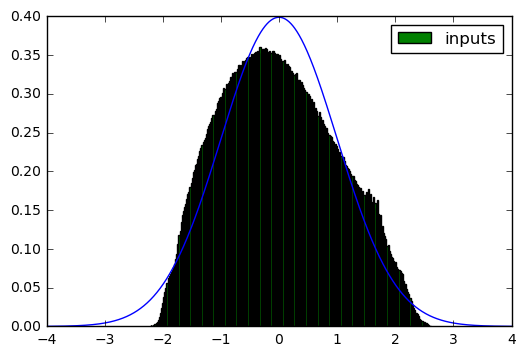

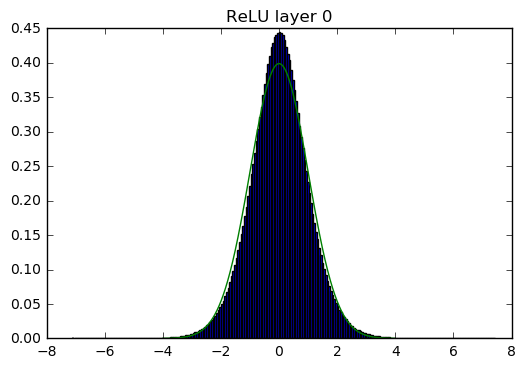

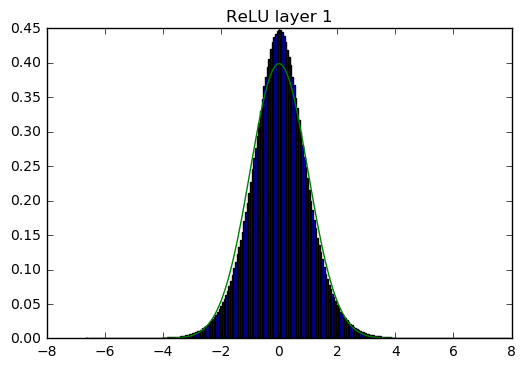

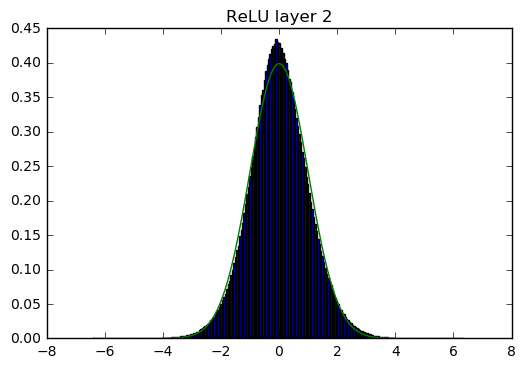

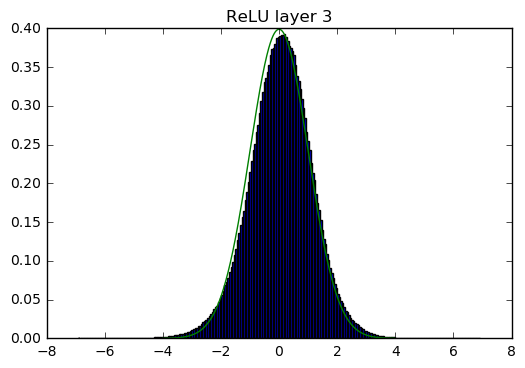

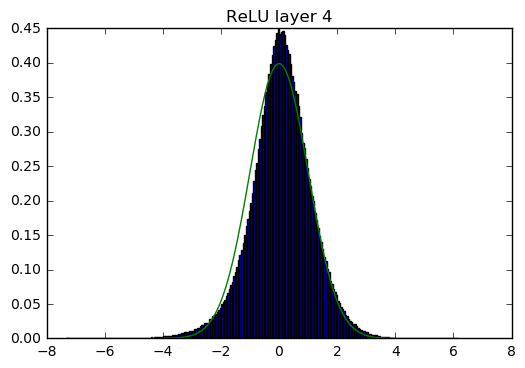

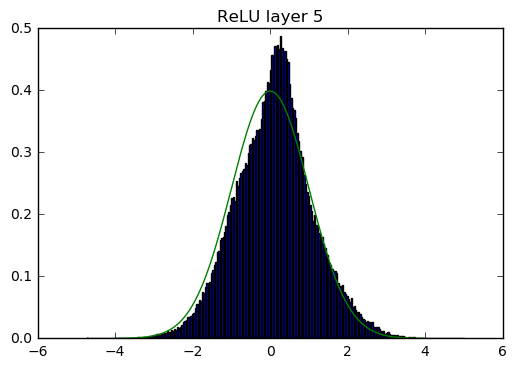

In [31]:
BINS = 256
linespace = np.linspace(-4, 4, 1000).asnumpy()

inputs = X
pl.plot(linespace, gaussian.pdf(linespace))
pl.hist(inputs.asnumpy().flatten(), bins=BINS, normed=True, label='inputs')
pl.legend()
for index, W in enumerate(weights):
    inputs = np.dot(inputs, W)
    pl.figure()
    pl.title('%s layer %d' % (activation, index))
    pl.hist(inputs.asnumpy().flatten(), bins=BINS, normed=True)
    pl.plot(linespace, gaussian.pdf(linespace))
        
    pre_mean = np.mean(inputs)
    pre_std = np.std(inputs)
    inputs = activations[activation](inputs)
    post_mean = np.mean(inputs)
    post_std = np.std(inputs)
    print 'pre-activation: {:<8} post-activation: {:<8} ratio: {:<8}'.format(
        pre_std,
        post_std,
        post_std / pre_std
    )